In [1]:
from autograd import Element, Neuron, Layer, MLP
from plotting import draw_dot
from loss import MeanSquaredError
from optimizer import GradientDescent

In [2]:
a = Element(2, label='a')
b = Element(3, label='b')
c = Element(4, label='c')

x1 = a * b
x2 = x1.tanh()
x3 = x1.sigmoid()
x4 = x1.relu()
x5 = x2 + x3
x6 = x3 - x4
x7 = x5 / x6
x8 = (-x7) ** 2
x8

Element(
	data=0.15944492327368448,
	label=((((tanh((a*b))+sigmoid((a*b)))/(sigmoid((a*b))-relu((a*b))))*-1)**2)
)

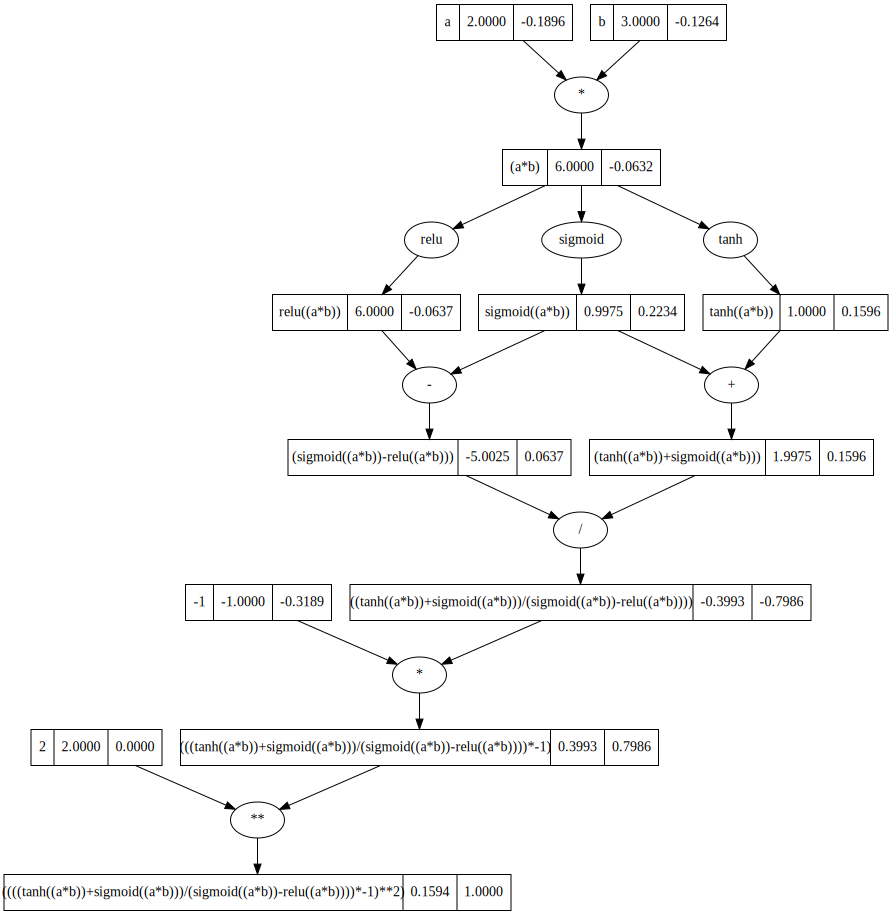

In [3]:
x8.backward()
draw_dot(x8)

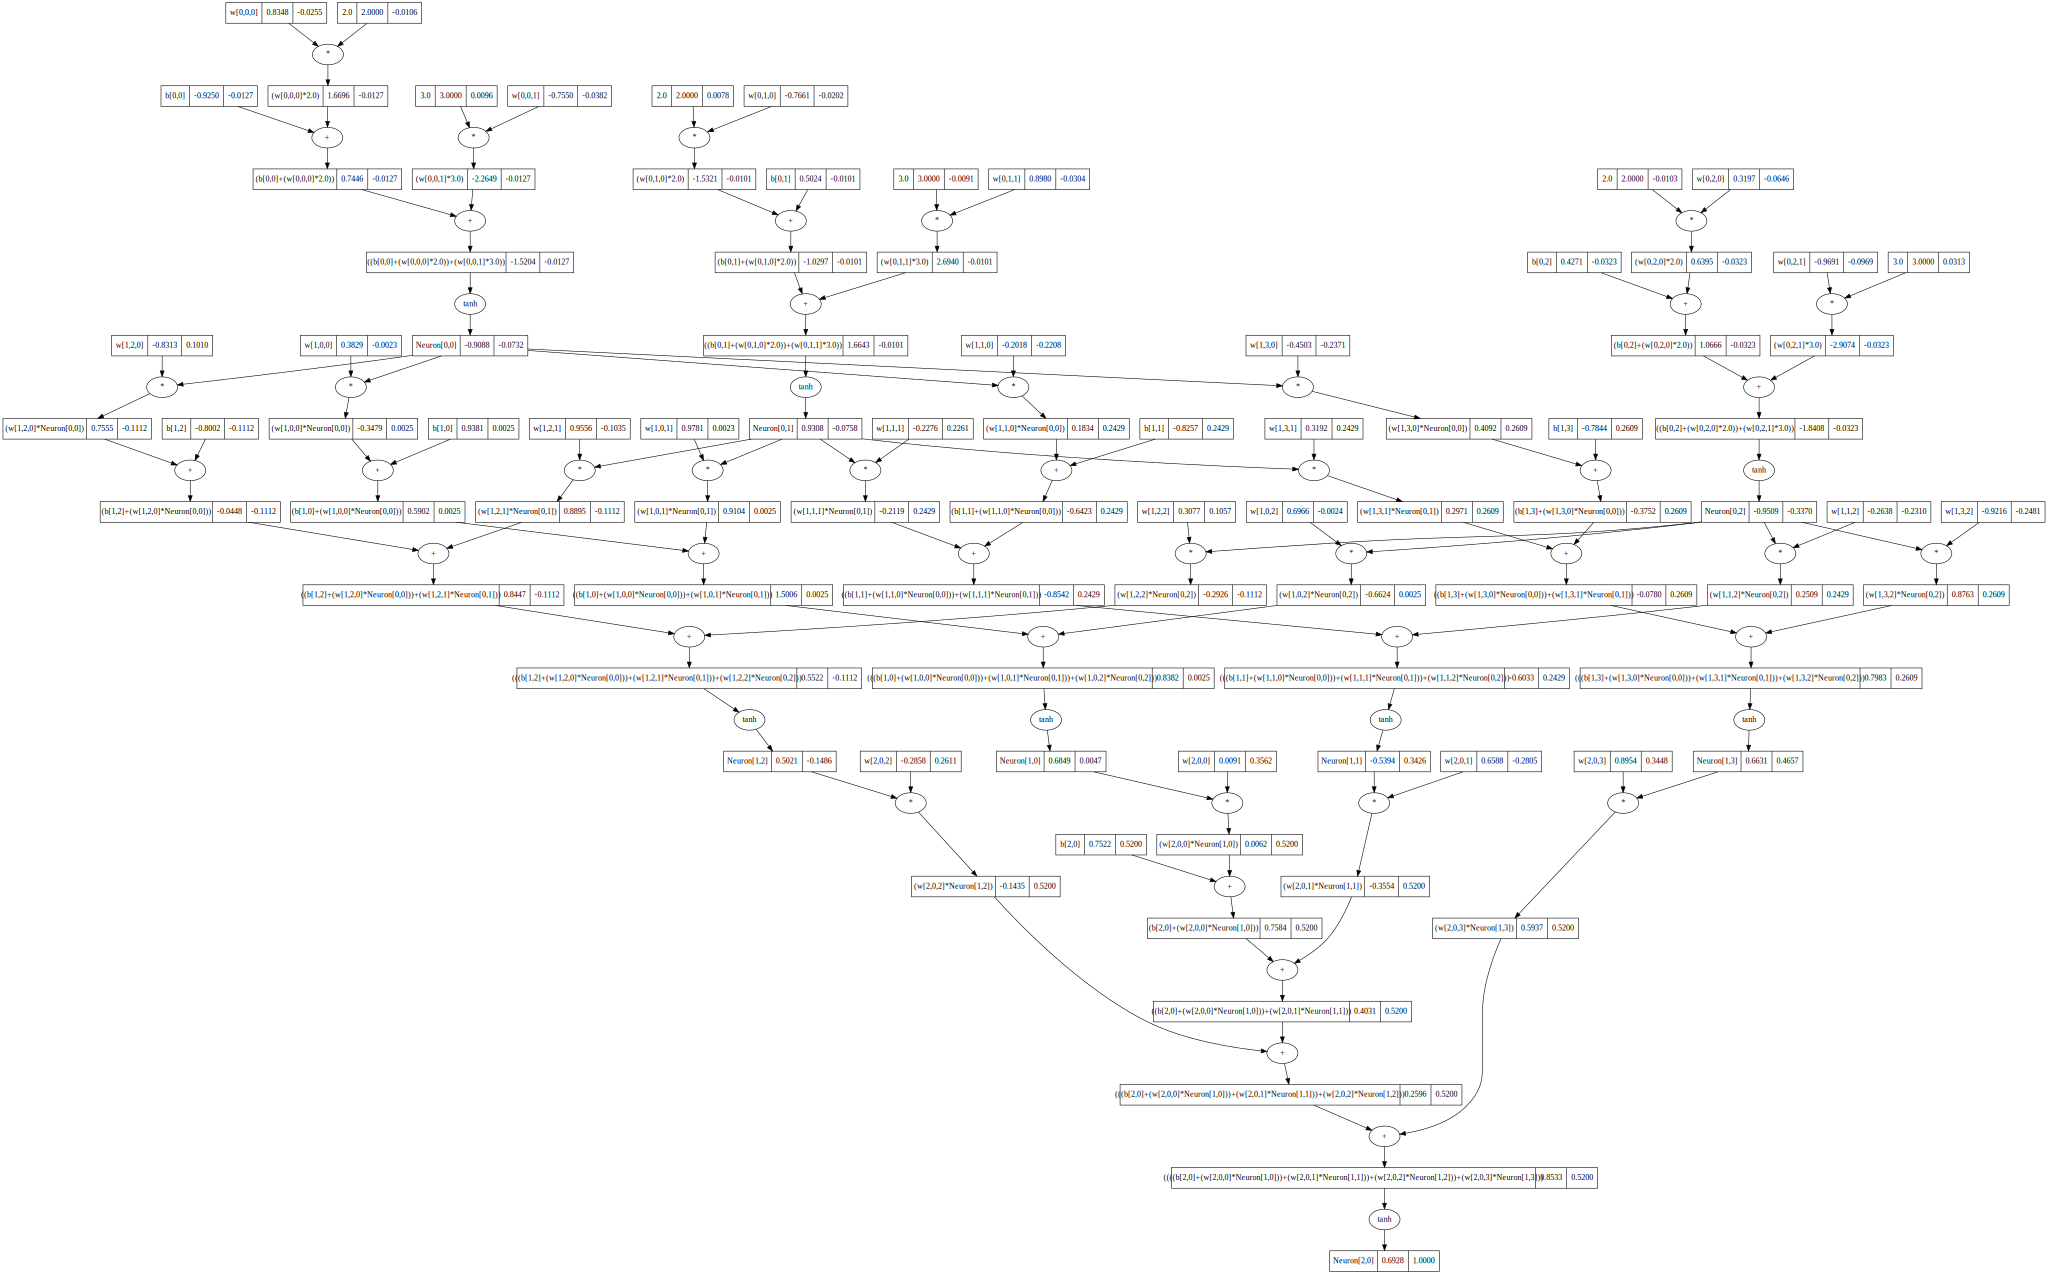

In [4]:
x = [2.0, 3.0]
n = MLP(2, [3, 4, 1], "tanh")
out = n(x)
out.backward()
draw_dot(out)

In [5]:
n.parameters()

[Element(
 	data=0.8347882763988754,
 	label=w[0,0,0]
 ),
 Element(
 	data=-0.7549826662212751,
 	label=w[0,0,1]
 ),
 Element(
 	data=-0.9249840296528802,
 	label=b[0,0]
 ),
 Element(
 	data=-0.7660515374429719,
 	label=w[0,1,0]
 ),
 Element(
 	data=0.8980040519445254,
 	label=w[0,1,1]
 ),
 Element(
 	data=0.5023709484443448,
 	label=b[0,1]
 ),
 Element(
 	data=0.3197415650534192,
 	label=w[0,2,0]
 ),
 Element(
 	data=-0.9691187774384558,
 	label=w[0,2,1]
 ),
 Element(
 	data=0.4271137591073093,
 	label=b[0,2]
 ),
 Element(
 	data=0.38287897401486903,
 	label=w[1,0,0]
 ),
 Element(
 	data=0.9781322340545568,
 	label=w[1,0,1]
 ),
 Element(
 	data=0.6966037129135749,
 	label=w[1,0,2]
 ),
 Element(
 	data=0.9381044173298989,
 	label=b[1,0]
 ),
 Element(
 	data=-0.20183921008408312,
 	label=w[1,1,0]
 ),
 Element(
 	data=-0.22761324574372122,
 	label=w[1,1,1]
 ),
 Element(
 	data=-0.2638154997831148,
 	label=w[1,1,2]
 ),
 Element(
 	data=-0.8257197238821354,
 	label=b[1,1]
 ),
 Element(
 	d

In [6]:
a = [[5]]*5
b = [[Element(2)]]*5
mse = MeanSquaredError()
print(mse(a, b))

Element(
	data=9.0,
	label=((((((0+((e_1-5)**2))+((e_1-5)**2))+((e_1-5)**2))+((e_1-5)**2))+((e_1-5)**2))/5)
)


In [11]:
model = MLP(2, [3, 4, 1], "tanh")
gd = GradientDescent(200, mse, model, 1e-2)
xis = [
    [2.0, 3.0],
    [-3.0, 4.0],
    [4.0, -5.0]
]
yis = [
    [1.0],
    [0.0],
    [-1.0]
]

model, gd

(<autograd.MLP at 0x1c4904f1b80>, <optimizer.GradientDescent at 0x1c49053d910>)

In [12]:

gd(xis, yis)

Epoch 1: 0.7433
Epoch 21: 0.1647
Epoch 41: 0.0858
Epoch 61: 0.0648
Epoch 81: 0.0521
Epoch 101: 0.0433
Epoch 121: 0.0368
Epoch 141: 0.0319
Epoch 161: 0.0280
Epoch 181: 0.0249
Epoch 200: 0.0224


In [13]:
[[model(xi)] for xi in xis]

[[Element(
  	data=0.7975466813979142,
  	label=Neuron[2,0]
  )],
 [Element(
  	data=0.034919533101374516,
  	label=Neuron[2,0]
  )],
 [Element(
  	data=-0.8427519178886479,
  	label=Neuron[2,0]
  )]]